In [1]:
import pandas as pd

# Unpickle the dataframe
file_path = 'PreOptimisationDataStore/WeatherData.pickle'
weather_data = pd.read_pickle(file_path)

# Display the dataframe
weather_data.head()


,0
0,11.88
1,11.88
2,11.88
3,11.88
4,11.88


In [2]:
import numpy as np

def monte_carlo_samples(df, n_samples, n_points):
    df_hold = df.copy()
    max_start_index = len(df) - n_points
    samples = []
    maxiter = n_samples *10
    itercount = 0
    while len(samples ) <= n_samples:
        start_index = np.random.randint(0, max_start_index + 1)
        sample = df.iloc[start_index:start_index + n_points]
        df.drop(df.index[start_index:start_index + n_points], inplace=True)
        
        # Check if sample is not empty and does not contain NaN values
        if not sample.empty and not sample.isnull().values.any():
            samples.append(sample)
        itercount += 1 
        if itercount > maxiter:
            print('Not enough values, having to re-sample the original dataset to generate more samples.')
            df = df_hold.copy()
            itercount = 0
    return samples

# Example usage
n_samples = 100
n_points = 168
samples = monte_carlo_samples(weather_data, n_samples, n_points)




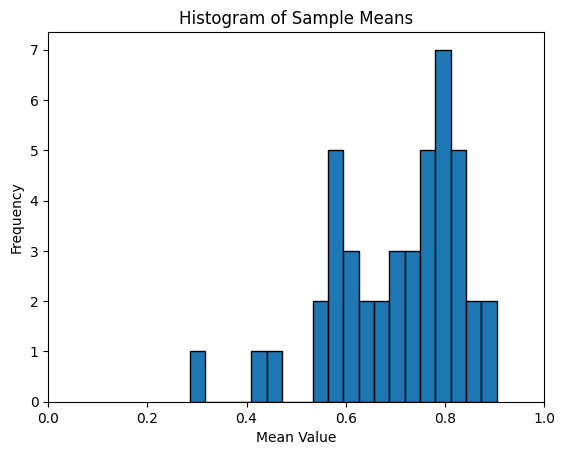

In [3]:
import matplotlib.pyplot as plt

# Calculate the mean of each sample
sample_means = [sample.mean().values[0]/11.88 for sample in samples]

# Plot the histogram of the mean values
plt.hist(sample_means, bins=20, edgecolor='black')
plt.xlim(0, 1)
plt.title('Histogram of Sample Means')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.show()

In [4]:
from scipy import stats
import numpy as np

# Define the sample means
data = np.array(sample_means)

# Test against a normal distribution
stat, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))

print(f"KS Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print('Sample follows a normal distribution (fail to reject H0)')
else:
    print('Sample does not follow a normal distribution (reject H0)')

KS Statistic: 0.1318254106717206
P-value: 0.39464477510139384
Sample follows a normal distribution (fail to reject H0)


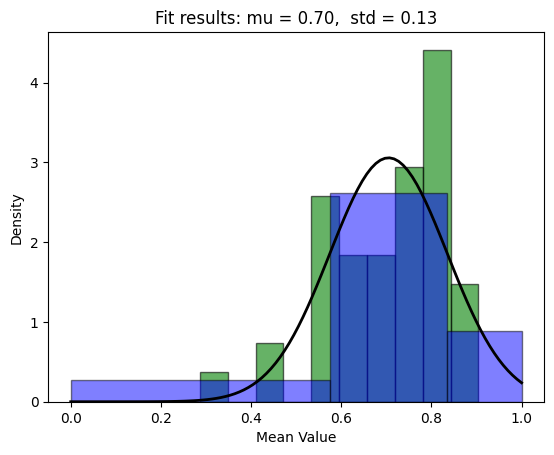

In [13]:
# Plot the histogram of the mean values
plt.hist(sample_means, bins=10, edgecolor='black', density=True, alpha=0.6, color='g')

# Plot the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(0, 1, 100)
p = stats.norm.pdf(x, np.mean(data), np.std(data))
plt.plot(x, p, 'k', linewidth=2)

# Discretize the normal distribution into three bins
mean = np.mean(data)
std_dev = np.std(data)

# Define the bin edges
bin_edges = [0, mean - std_dev, mean + std_dev, 1]

# Calculate the bin heights
bin_heights = []
for i in range(len(bin_edges) - 1):
    bin_heights.append(stats.norm.cdf(bin_edges[i + 1], mean, std_dev) - stats.norm.cdf(bin_edges[i], mean, std_dev))

# Convert bin_edges to a NumPy array
bin_edges = np.array(bin_edges)

# Normalize the bin heights to match the histogram density
bin_heights = np.array(bin_heights) / (bin_edges[1:] - bin_edges[:-1])

# Plot the discretized normal distribution
for i in range(len(bin_edges) - 1):
    plt.bar((bin_edges[i] + bin_edges[i + 1]) / 2, bin_heights[i], width=bin_edges[i + 1] - bin_edges[i], alpha=0.5, color='b', edgecolor='black')

title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std_dev)
plt.title(title)
plt.xlabel('Mean Value')
plt.ylabel('Density')
plt.show()

In [11]:
# Define the bin limits
upper_bin_limits = [np.mean(data) + np.std(data), 1]
middle_bin_limits = [np.mean(data) - np.std(data), np.mean(data) + np.std(data)]
lower_bin = [0, np.mean(data) - np.std(data)]

# Combine the bin limits into a single list
bin_limits = [lower_bin[0], lower_bin[1], middle_bin_limits[1], upper_bin_limits[1]]

# Create labels for the bins
bin_labels = ['Lower Bin', 'Middle Bin', 'Upper Bin']

# Use pd.cut to create the bins
sample_means_normalized = [sample.mean().values[0] / 11.88 for sample in samples]

# Use pd.cut to create the bins
indexed_bins = {'Lower Bin':[],
                'Middle Bin':[],
                'Upper Bin':[]}

for sample in samples:
    count = 0
    for bin_lim in bin_limits:
        if sample.mean().values[0] / 11.88 <= bin_lim:
            indexed_bins[bin_labels[count-1]].append(sample)
            break
        else:
            count += 1
# Display the dataframe with the new 'Bins' column


In [12]:
len(indexed_bins['Middle Bin'])

def generate_probabalistic_samples(indexed_bins, n_stages, n_stochastics, stage_duration, master_branches):
    samples = {}
    full_set = {}
    for s in range(n_stochastics ** n_stages):
        start_index = randint(0, len(wind_power) - (n_stages + 1) * stage_duration)
        full_set[s] = wind_power.iloc[start_index:start_index + (n_stages + 1) * stage_duration].reset_index(drop=True)

    for t in range((n_stages + 1) * stage_duration):
        for s in range(n_stochastics ** n_stages):
            if master_branches[(s, floor(t / stage_duration))] == 1:
                samples[(s, t)] = full_set[s].iloc[t].values[0]
            else:
                samples[(s, t)] = samples[(s - 1, t)]
    return samples
    



34